# Python Machine Learning for Biology


# Dimensionality Reduction and Manifold Learning

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Principal Components Analysis

#### Load the cancer dataset

In [34]:
cancer = pd.read_csv('data/cancer.csv')

In [35]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Store features and response as variables

In [36]:
X = cancer.drop('diagnosis',  axis = 1)

In [37]:
y = cancer['diagnosis']

#### Before applying PCA, each features should be centered on zero with unit variance

In [38]:
X_std = StandardScaler().fit_transform(X)

#### Use PCA to find the first two principal components of the breast cancer dataset

In [35]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components = 2)

In [41]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
X_pca = pca.transform(X_std)

In [43]:
print(X.shape, X_pca.shape)

(569, 30) (569, 2)


In [44]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

#### Plot the PCA-transformed version of the breast cancer dataset

In [45]:
pca1 = X_pca[:, 0]
pca2 = X_pca[:, 1]

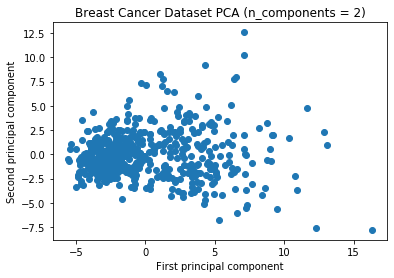

In [46]:
plt.scatter(pca1, pca2)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)')
plt.show()

#### Plot the magnitude of each feature value for the first two principal components

In [47]:
feature_names = list(X.columns)

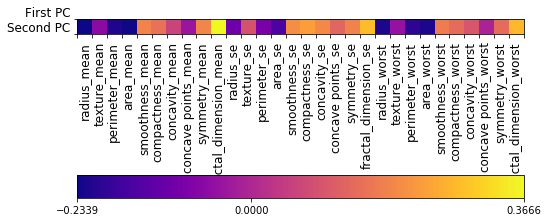

In [48]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
plt.gca().set_xticks(np.arange(-.5, len(feature_names)))
plt.gca().set_yticks(np.arange(0.5, 2))
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12)
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12)
plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                             pca.components_.max()], pad=0.65)
plt.show()

### Manifold Learning Methods

### Multidimensional scaling (MDS)

In [49]:
from sklearn.manifold import MDS

#### Make 'hello' data

In [50]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]


In [51]:
X = make_hello(1000)

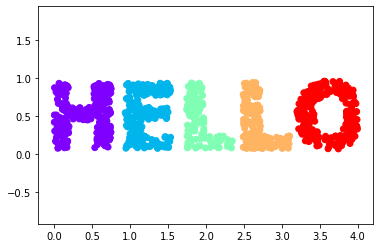

In [52]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')
plt.show()

#### Get pairwise distances

In [53]:
from sklearn.metrics import pairwise_distances

In [54]:
D = pairwise_distances(X)
D.shape

(1000, 1000)

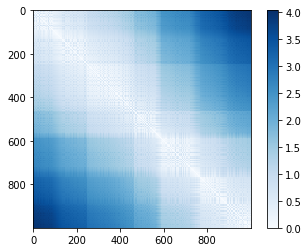

In [55]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()

#### MDS with 2 components

In [56]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)

In [57]:
out = model.fit_transform(D)

#### Plot MDS

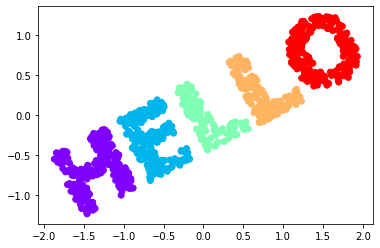

In [58]:
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')
plt.show()

### t-SNE

In [59]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.patheffects as PathEffects

#### Load the data

In [60]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [61]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### Take a look at the digits

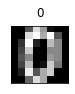

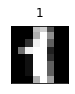

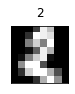

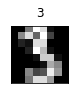

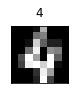

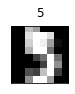

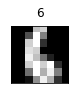

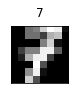

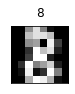

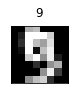

<Figure size 432x288 with 0 Axes>

In [62]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
    plt.show()
plt.savefig('digits-generated.png', dpi=150)

#### Redorder the datapoints according to the handwritten numbers

In [63]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

#### Run the t-SNE algorithm on the dataset

In [64]:
digits_proj = TSNE().fit_transform(X)

#### Function to display transformed dataset

In [65]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

#### Plot

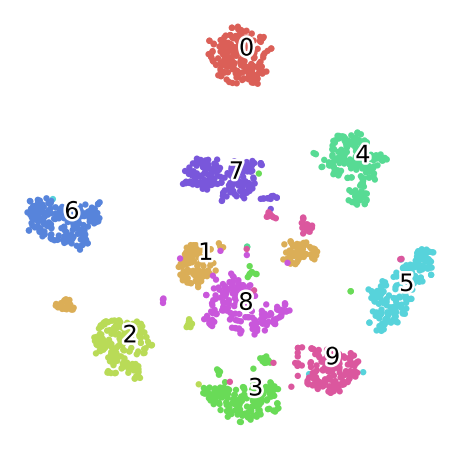

In [66]:
scatter(digits_proj, y)
plt.savefig('digits-tsne.png', dpi=150)

# Python Machine Learning for Biology
# Clustering

## K-means Clustering

In [14]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#### Make some blob data!

In [68]:
X, y = make_blobs(
    n_samples    =  200, 
    centers      =  3, 
    n_features   =  2,
    random_state =  0
)

In [69]:
blobs = pd.DataFrame(X, columns=['X', 'y'])
blobs.head()

,X,y
0,-1.733808,3.798061
1,0.628358,4.460136
2,1.131218,4.681950
3,-1.429179,3.500836
4,1.274508,5.630173


#### Make a scatterplot of your blob data 

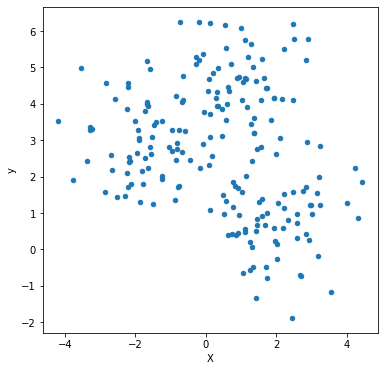

In [86]:
blobs.plot(kind="scatter", x="X", y="y", figsize=(6, 6))

#### Fit a K-means model with 3 clusters

In [71]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(blobs)

#### Get the predicted labels and centroids

In [72]:
predicted = kmeans.labels_
print(predicted)

[1 0 0 1 0 1 2 0 0 1 0 1 0 0 0 1 2 2 1 1 1 2 0 0 1 1 2 1 1 1 0 0 1 0 2 2 0
 2 2 1 2 1 1 1 0 0 0 1 0 0 0 2 1 1 1 1 2 2 0 0 1 0 0 2 2 1 2 2 1 2 2 0 0 1
 0 1 2 2 2 1 1 0 0 2 2 0 0 1 0 2 1 1 2 0 2 0 0 1 1 2 2 0 1 0 1 0 2 0 1 2 0
 1 2 0 0 0 0 2 1 1 2 2 1 0 2 1 1 2 1 0 1 2 2 2 0 2 2 0 2 1 1 1 0 2 2 0 1 1
 2 0 2 1 1 1 0 2 2 2 0 0 2 1 1 1 0 0 2 1 2 2 1 2 0 2 1 1 2 1 0 2 0 1 2 2 2
 2 1 2 0 0 1 1 2 2 2 2 1 2 0 2]


In [73]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.97692125  4.56883102]
 [-1.71656153  2.91261167]
 [ 1.98410174  0.81302038]]


#### Make a new column in the blobs dataframe for the predicted labels

In [74]:
blobs['predicted'] = predicted
blobs.head()

,X,y,predicted
0,-1.733808,3.798061,1
1,0.628358,4.460136,0
2,1.131218,4.681950,0
3,-1.429179,3.500836,1
4,1.274508,5.630173,0


#### Visually verify cluster labels

<Figure size 504x504 with 0 Axes>

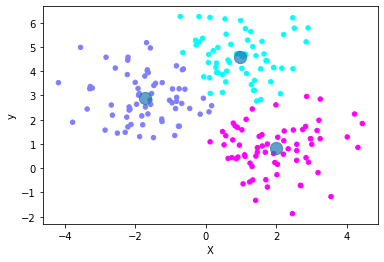

In [119]:
plt.figure(figsize=(7,7))
blobs.plot(x="X", y="y", kind="scatter", c=blobs['predicted'], cmap=plt.cm.cool, colorbar = False)
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7)
plt.show()

#### Calculate the silhouette coefficience

In [120]:
score = silhouette_score(blobs, predicted, metric='euclidean')
print(score)

0.5639633527283755


# Hierarchical Clustering

We will perform hierarchical clustering analysis on a dataset that details language skills from different European countries. We will perform a hierarchical clustering analysis on this dataset.

#### Read in the libraries

In [121]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
%matplotlib inline

#### Read in file

In [122]:
lang = pd.read_csv('data/lang.csv')
lang.head()

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


#### Create a scatterplot to see if we can find clusters

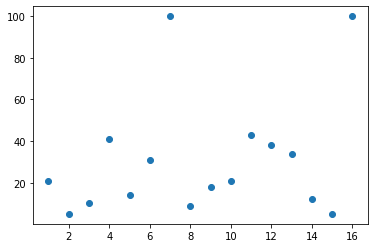

In [123]:
# scatter to guess clusters
plt.scatter(lang['country'], lang['english'])
plt.show()

#### Convert our data to a matrix to pass to the clustering algorithm 
The matrix makes it easier for our algorithm to compute distance.

In [125]:
X = lang.as_matrix(columns=None)

/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


#### Implement the clustering algorithm.

In [126]:
Z = linkage(X)

#### Calculate the cophenetic correlation coefficient
See how well our algorithm has measured the distances between the points.

In [127]:
c, coph_dists = cophenet(Z, pdist(X))

In [128]:
c

0.8363972125185829

### Make a dendrogram

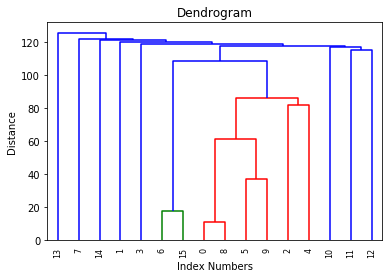

In [129]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

In [130]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

    ax[0].set_title("Max Dist: %d" % max_dist)
    
    # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
    ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()
interact(plot_wrapper, max_dist=IntSlider(min=100, max=200, step=1))

interactive(children=(IntSlider(value=100, description='max_dist', max=200, min=100), Output()), _dom_classes=…

<function __main__.plot_wrapper(max_dist)>

Clusters represented at distance:  {1}
Clusters represented at distance:  {1}
Clusters represented at distance:  {1}
Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


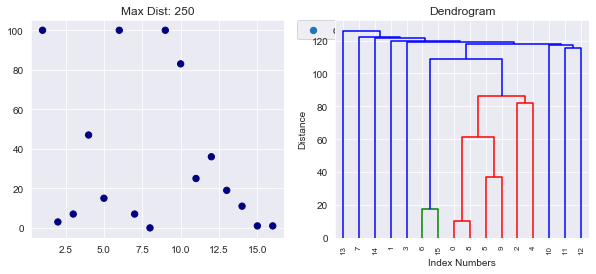

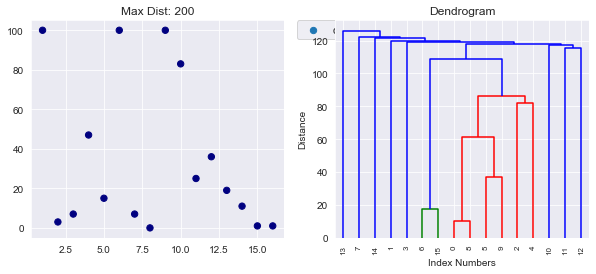

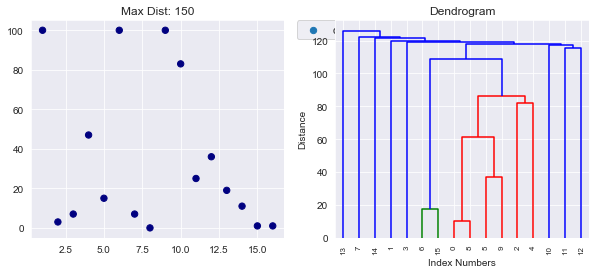

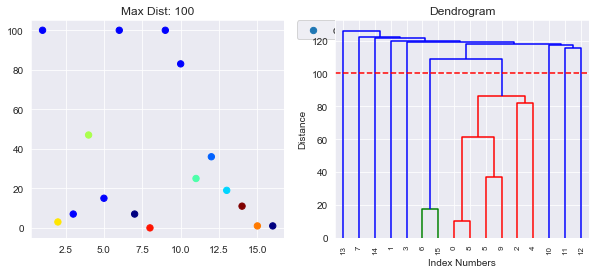

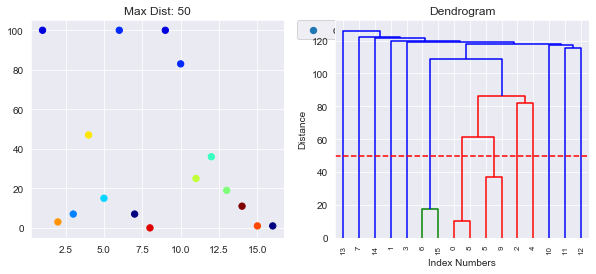

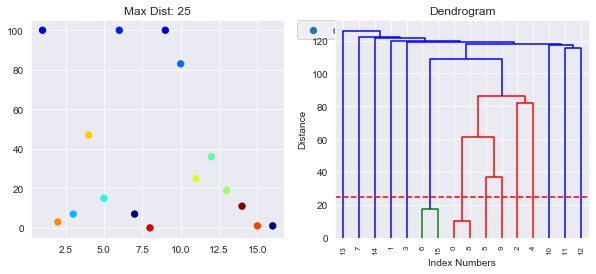

In [131]:
plot_dist_thresh(250)
plot_dist_thresh(200)
plot_dist_thresh(150)
plot_dist_thresh(100)
plot_dist_thresh(50)
plot_dist_thresh(25)

### DBSCAN

In [132]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#### Generate sample data

In [133]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [134]:
X = StandardScaler().fit_transform(X)

### Compute DBSCAN

In [135]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

### Number of clusters in labels, ignoring noise if present.

In [136]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [137]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


#### Plot result

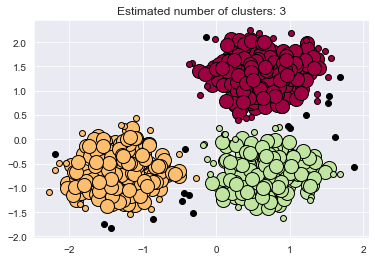

In [138]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Clustering Metrics

#### Load in the chemical data and make a scatterplot

In [139]:
chem = pd.read_csv('data/chem.csv').iloc[:, 1:]

In [140]:
chem.head()

,Al,Ca,Fe,K,Mg,Mn,Na,P,Si,Ti
0,101,11,-22,-17,-34,-41,27,-36,-58,-28
1,50,129,23,-82,47,33,61,90,-24,9
2,5,65,-22,-96,-33,7,47,49,30,-39
3,-40,-16,-158,-70,-104,-114,53,-61,103,-160
4,-13,30,-82,-113,26,-41,65,-90,43,-130


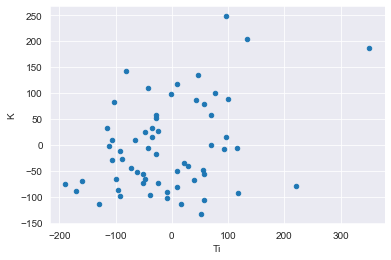

In [141]:
chem.plot(kind="scatter", x="Ti", y="K")

#### Silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.41813365052000306


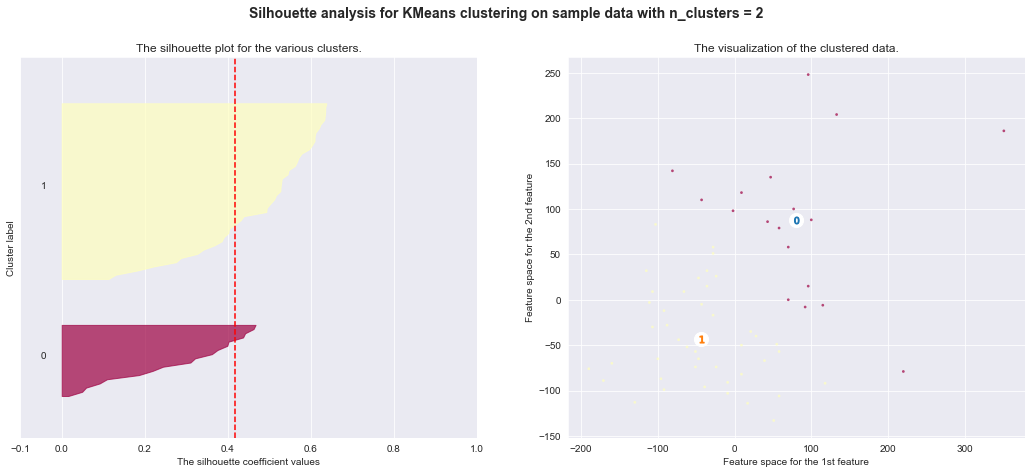

For n_clusters = 3 The average silhouette_score is : 0.38874656401894675


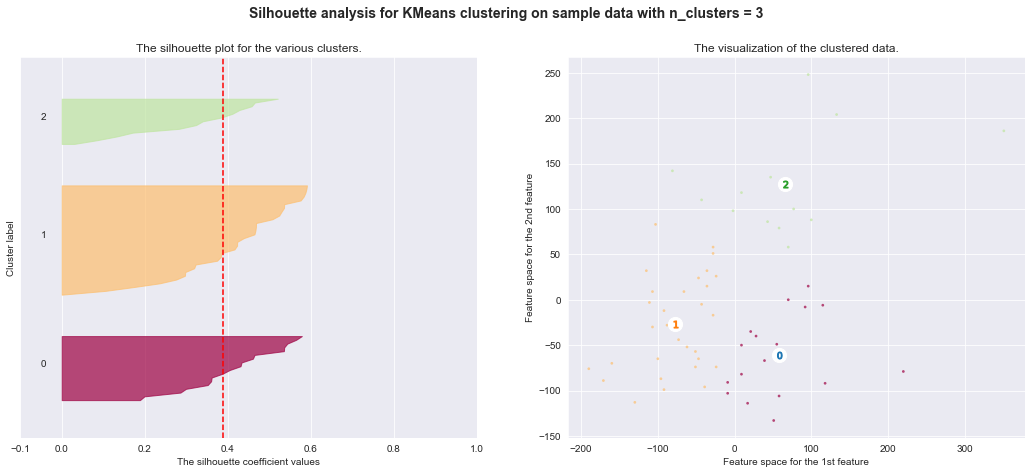

For n_clusters = 4 The average silhouette_score is : 0.38885298505078336


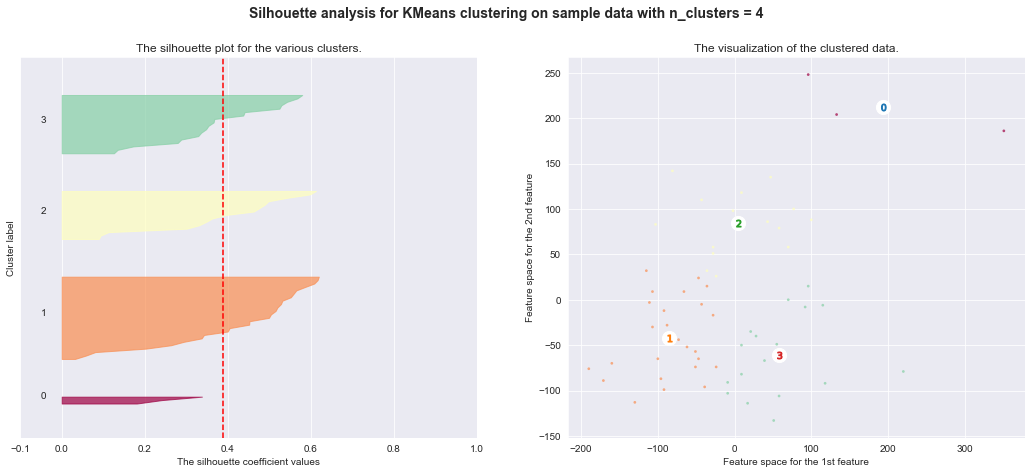

For n_clusters = 5 The average silhouette_score is : 0.37009514910579033


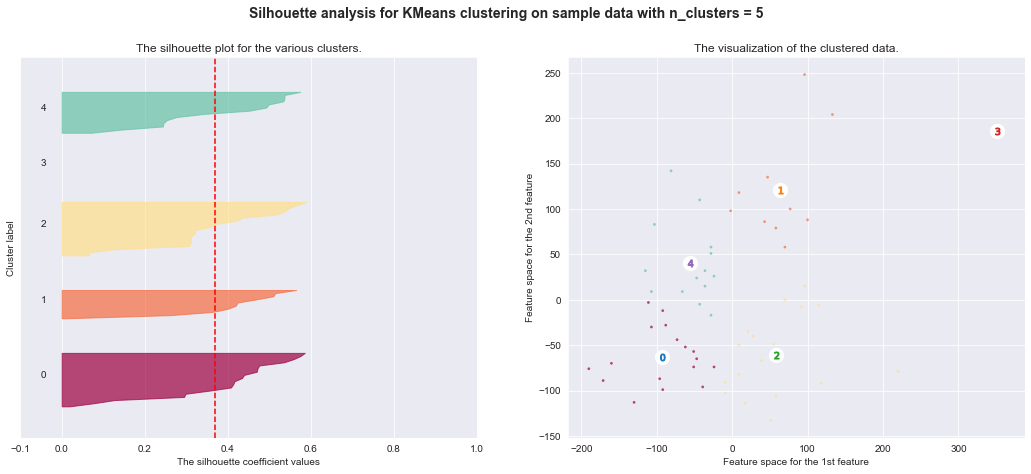

For n_clusters = 6 The average silhouette_score is : 0.3695822189896142


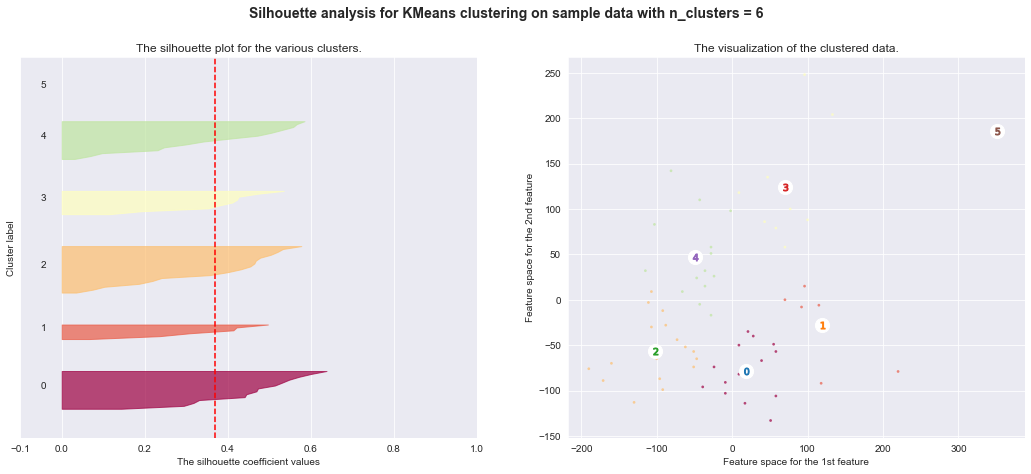

In [144]:
X = chem[['Ti', 'K']].values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### Elbow method

Sometimes our elbow isn't well-defined.

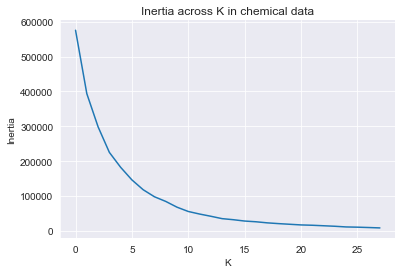

In [145]:
# As you can see, sometimes there is not a well-defined elbow!
inertias = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K in chemical data")
sns.despine()

# Independent Exercises

### Dimensionality Reduction
Conduct a PCA on the iris dataset to reduce dimensions down to 2.

In [26]:
iris = pd.read_csv("data/iris.csv")

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
X = iris.drop(['species'], 1)
y = iris.loc[:,['species']]

In [32]:
X = StandardScaler().fit_transform(X)

In [37]:
pca = PCA(n_components=2)

In [39]:
principalComponents = pca.fit_transform(X)

In [40]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [41]:
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

In [43]:
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


In [50]:
import seaborn as sns

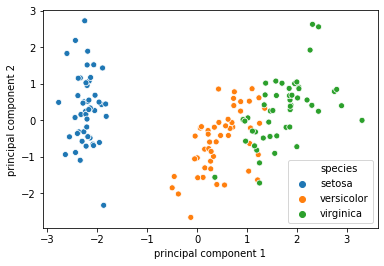

In [51]:
sns.scatterplot(x="principal component 1", y="principal component 2", hue="species", data=finalDf)

In [44]:
# first principal component contains 72.77% of the variance
# second principal component contains 23.03% of the variance
# together they contain 95.80% 
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

### Clustering: K-Means

Using the titanic dataset.
* Fit a k-means model with a k of your choice. 
* Compute the silhouette score for your model.
* Using the code above create silhouette plots.
* Create an elbow plot

In [2]:
titanic = pd.read_csv("data/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.fillna(titanic.mean(), inplace=True)

In [6]:
titanic = titanic.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [9]:
labelEncoder = LabelEncoder()
labelEncoder.fit(titanic['Sex'])
titanic['Sex'] = labelEncoder.transform(titanic['Sex'])

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [11]:
X = titanic.drop(['Survived'], 1)

In [12]:
y = titanic['Survived']

In [15]:
# cluster the passenger records into 2: Survived or Not Survived
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
titanic["prediction"] = kmeans.predict(X)

In [21]:
titanic["correct"] = titanic["prediction"] == titanic["Survived"]

In [25]:
print("accuracy is: " , titanic["correct"].sum()/len(X))

accuracy is:  0.5084175084175084
